### AutoEncoders

In [6]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt 
%matplotlib inline

In [87]:
(x_train,_), (x_test, _) = load_data()

In [88]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [89]:
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

In [90]:
x_train = x_train/255
x_test = x_test/255

In [8]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Autoencoder

In [105]:
from tensorflow.keras.optimizers import Adam

In [106]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(784))

In [107]:
model.compile(optimizer= "adam", loss="mean_squared_error")

In [108]:
model.fit(x=x_train, y=x_train, epochs=30, batch_size=1000, validation_data=(x_test, x_test))

Epoch 1/30
60/60 [==============================] - 2s 31ms/step - loss: 0.0674 - val_loss: 0.0483
Epoch 2/30
60/60 [==============================] - 1s 24ms/step - loss: 0.0379 - val_loss: 0.0305
Epoch 3/30
60/60 [==============================] - 1s 23ms/step - loss: 0.0273 - val_loss: 0.0240
Epoch 4/30
60/60 [==============================] - 1s 21ms/step - loss: 0.0227 - val_loss: 0.0208
Epoch 5/30
60/60 [==============================] - 1s 22ms/step - loss: 0.0203 - val_loss: 0.0190
Epoch 6/30
60/60 [==============================] - 1s 24ms/step - loss: 0.0188 - val_loss: 0.0179
Epoch 7/30
60/60 [==============================] - 1s 25ms/step - loss: 0.0177 - val_loss: 0.0168
Epoch 8/30
60/60 [==============================] - 1s 22ms/step - loss: 0.0169 - val_loss: 0.0162
Epoch 9/30
60/60 [==============================] - 1s 21ms/step - loss: 0.0163 - val_loss: 0.0157
Epoch 10/30
60/60 [==============================] - 1s 21ms/step - loss: 0.0159 - val_loss: 0.0154
Epoch 11/

In [94]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_23 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_24 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_25 (Dense)             (None, 784)               101136    
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.layers

### Encoder

In [57]:
model.layers[:-2]

In [109]:
encoder = Sequential()
for layer in model.layers[:-2]:
    encoder.add(layer)

In [110]:
encoder.build(input_shape=(None,784))

In [111]:
encoder.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
Total params: 108,736
Trainable params: 108,736
Non-trainable params: 0
_________________________________________________________________


### Decoder

In [113]:
decoder = Sequential()
for layer in model.layers[-2:]:
    decoder.add(layer)
decoder.build(input_shape = (None, 64))
decoder.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_29 (Dense)             (None, 784)               101136    
Total params: 109,456
Trainable params: 109,456
Non-trainable params: 0
_________________________________________________________________


### Encoder and Decoder in action

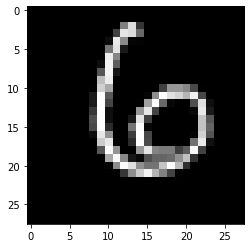

In [114]:
plt.imshow(x_test[100].reshape(28,28), cmap="gray")
plt.show()

In [115]:
preds = encoder.predict(x_test)

In [116]:
preds.shape

(10000, 64)

In [117]:
preds[100]

array([1.4870317 , 0.        , 1.0135392 , 0.        , 0.        ,
       1.1661575 , 1.098959  , 1.236976  , 1.8782929 , 0.        ,
       0.6549958 , 0.        , 0.        , 1.7659057 , 0.        ,
       1.3555905 , 0.        , 0.        , 0.5921495 , 0.8453766 ,
       1.046251  , 1.082632  , 1.153393  , 1.5570191 , 1.3903147 ,
       2.1551006 , 1.4294298 , 0.42946133, 2.1037004 , 1.3224694 ,
       1.8571554 , 1.6882789 , 1.6156126 , 1.4370033 , 1.7418653 ,
       1.0916799 , 0.        , 1.087425  , 1.7925395 , 0.        ,
       0.        , 1.7290621 , 0.85894275, 1.1919992 , 0.        ,
       0.        , 1.3197969 , 1.647458  , 0.        , 0.76987755,
       0.69731754, 2.0740266 , 0.        , 0.        , 0.9117539 ,
       0.76509935, 0.        , 0.        , 1.0048791 , 1.1872649 ,
       0.        , 0.64336014, 1.1701874 , 2.0716815 ], dtype=float32)

In [118]:
reconstructed_ouput = decoder.predict(preds)

In [119]:
reconstructed_ouput[100].shape

(784,)

In [123]:
reconstructed_ouput = reconstructed_ouput *255 

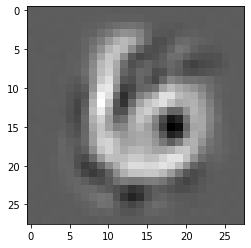

In [125]:
plt.imshow(reconstructed_ouput[100].reshape(28,28), cmap="gray")
plt.show()